In [29]:
import pandas as pd
from tokenizers import SimpleTokenizer
from sentiment_analyzer import SimpleSentimentAnalyzer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./resources/sample_data/reddit-comments-2015-08.csv')

In [3]:
df.head()

,body
0,I joined a new league this year and they have ...
1,"In your scenario, a person could just not run ..."
2,They don't get paid for how much time you spen...
3,"I dunno, back before the August update in an A..."
4,"No, but Toriyama sometimes would draw himself ..."


In [4]:
tokenizer = SimpleTokenizer()
tokenize = lambda x: tokenizer.tokenize(x)

In [5]:
df['tokens'] = df['body'].apply(tokenize)

In [6]:
df.head()

,body,tokens
0,I joined a new league this year and they have ...,"[joined, league, scoring, rules, slight, ppr, ..."
1,"In your scenario, a person could just not run ...","[scenario, person, mandatory, background, chec..."
2,They don't get paid for how much time you spen...,"[paid, time, spend, building, army, paid, gem,..."
3,"I dunno, back before the August update in an A...","[dunno, august, update, lobby, tower, control,..."
4,"No, but Toriyama sometimes would draw himself ...","[toriyama, draw, robot, shen, funny, character..."


In [18]:
sa = SimpleSentimentAnalyzer()
score_sentiment = lambda x: sa.score(x)

In [19]:
df['sent_score'] = df['tokens'].apply(lambda x: sa.score(x))

In [21]:
df['sent_score'].sum()

-11603

In [22]:
df['sent_score'].mean()

-0.7735333333333333

In [23]:
df['sent_score'].median()

0.0

In [33]:
df.head()

,body,tokens,sent_score
0,I joined a new league this year and they have ...,"[joined, league, scoring, rules, slight, ppr, ...",-1
1,"In your scenario, a person could just not run ...","[scenario, person, mandatory, background, chec...",-7
2,They don't get paid for how much time you spen...,"[paid, time, spend, building, army, paid, gem,...",2
3,"I dunno, back before the August update in an A...","[dunno, august, update, lobby, tower, control,...",-5
4,"No, but Toriyama sometimes would draw himself ...","[toriyama, draw, robot, shen, funny, character...",-1


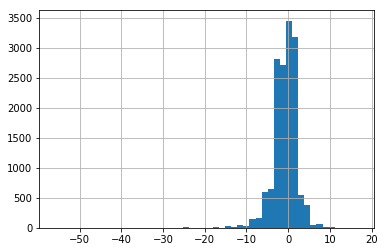

In [37]:
df['sent_score'].hist(bins=50)

In [44]:
for row in df[df['sent_score'] < -30]['body']:
    print(row)

"Damn and blast!" Rincewind said, peering up from the cold, hard dirt -- at least, he would think of it as dirt -- as the Creatures of the Dungeon Dimensions variously lurched and wobbled closer towards him. 

Now not only was he going to face an endless nightmare of unending suffering without hope for the sweet mercies of death, but he was going to do so naked, which was to say, without his hat. A wizard, or in his case a Wizzard, could only truly be said to be in the nudd if he had lost his hat of office, and since the Luggage had kept a firm grip on his hat in a vain attempt to pull him back through the recently opened portal to the Dungeon Dimensions, he was now not only here but also thoroughly embarrassed, not at his disrobed state but at the lack of that one badge of office which would have allowed him at least a modicum of dignity as he gibbered with fear and agony for all time.

Picking up his staff, Rincewind judged he had about 100 revolutions of a demon's hand before the Cr